In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as snb
%matplotlib inline

In [4]:
data=pd.read_excel(r'C:\Users\abhay\Documents\NewRepo\Team_B_sameer_abhay\DataAnalysis\OnlineRetail.xlsx')

In [6]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**CUSTOMERS DATA ANALYSIS**

In [8]:
#Added an extra column for month
data['month']=data['InvoiceDate'].dt.month

In [9]:
#Added an extra column for year
data['year']=data['InvoiceDate'].dt.year

**Customer plot by month**

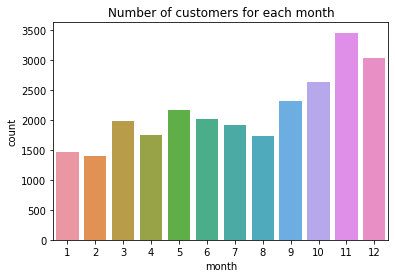

In [170]:
#Customer plot by month
customer_by_month=data.groupby(['InvoiceNo']).first()
customer_by_month
snb.countplot(x='month',data=customer_by_month)
plt.title('Number of customers for each month')
plt.show()

**Customer plot by year**

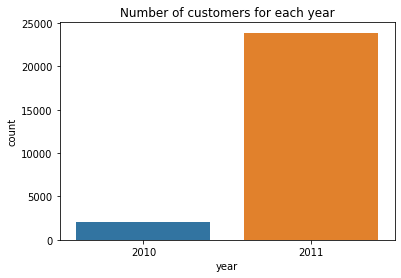

In [171]:
customer_by_year=data.groupby(['InvoiceNo']).first()
snb.countplot(x='year',data=customer_by_year)
plt.title('Number of customers for each year')
plt.show()

**Distribution of customers vs countries**

In [188]:
#Finding countries
countries=data['Country'].unique()
print(countries)

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


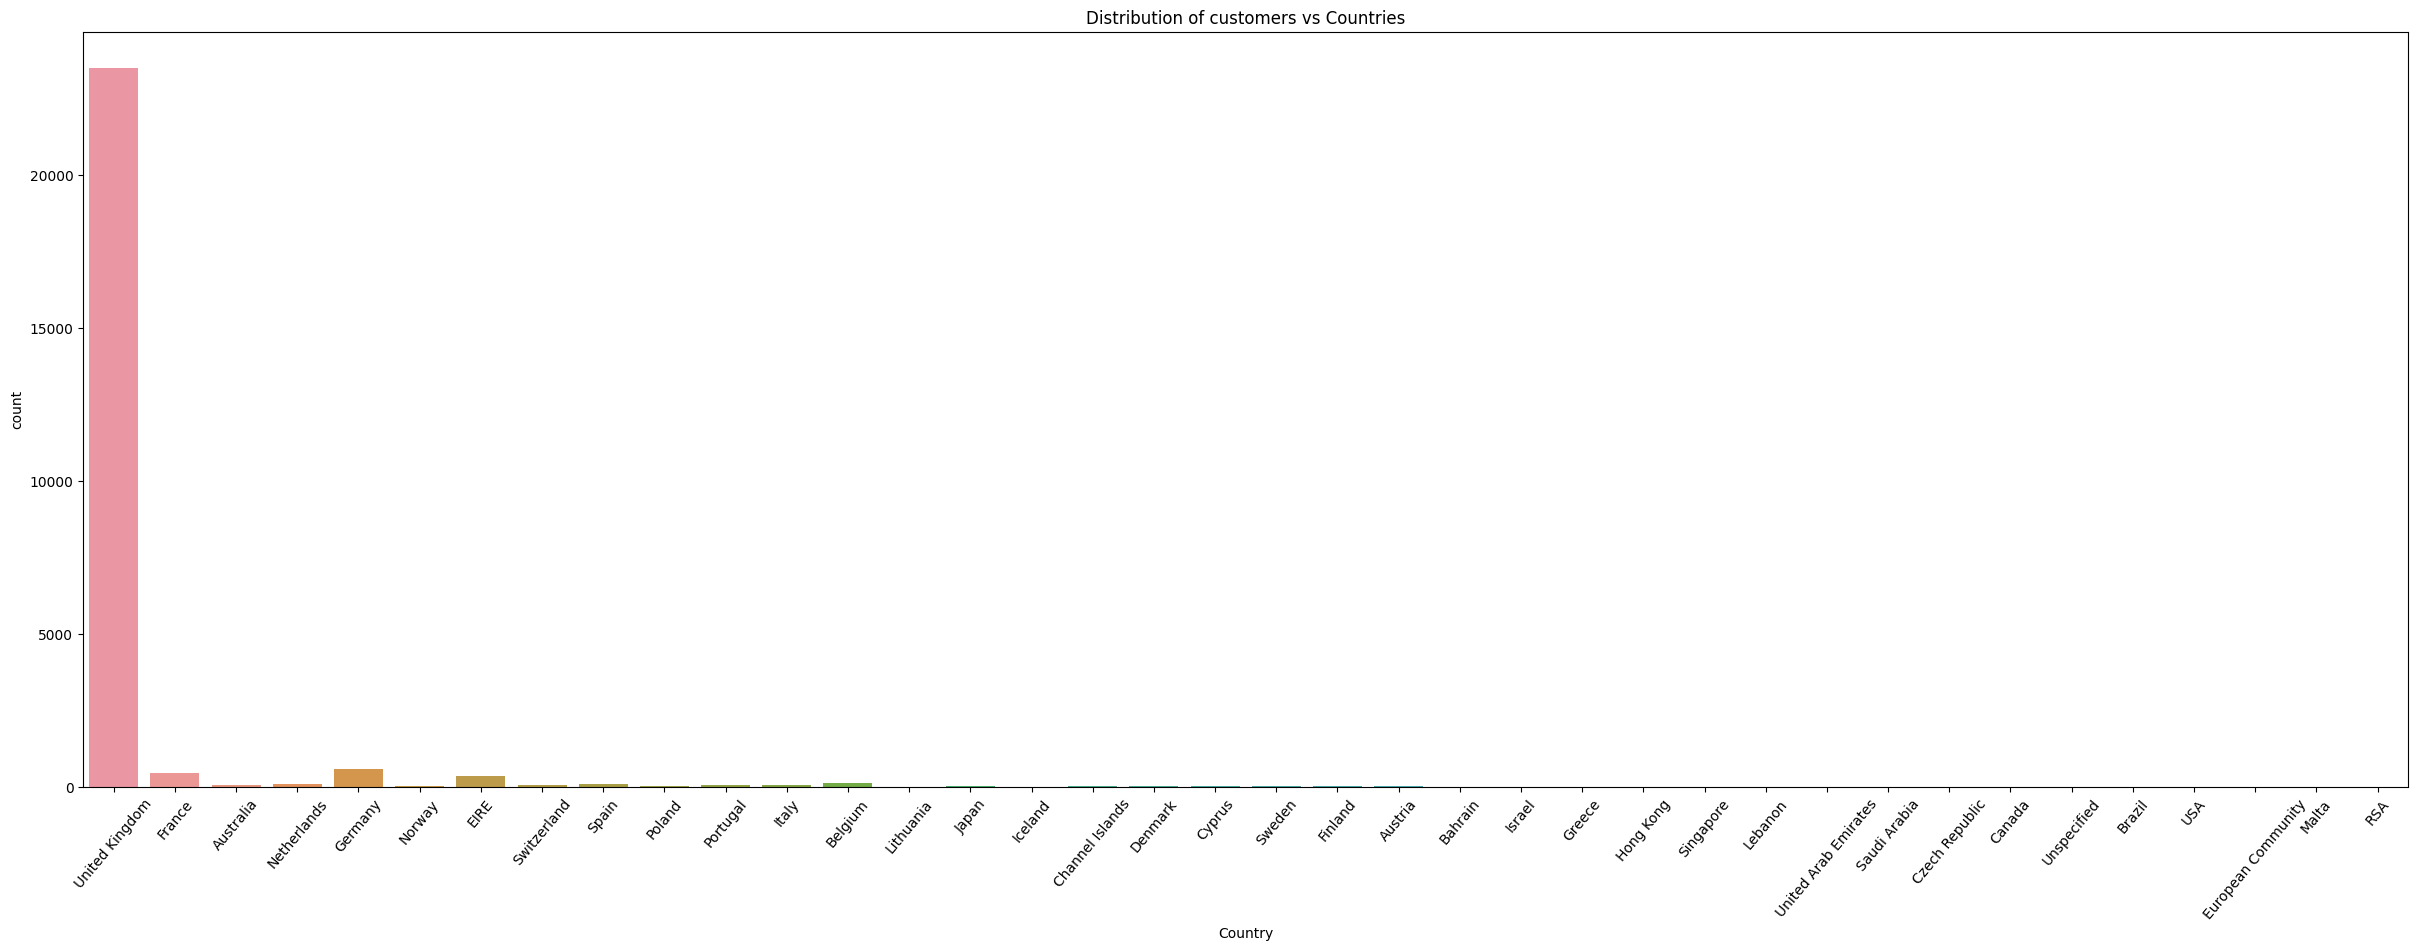

In [173]:
plt.figure(figsize=(30,10),dpi=100)
plt.xticks(rotation=50)
plt.title('Distribution of customers vs Countries')
snb.countplot(x='Country',data=customer_by_year)
plt.show()

**REVENUE DATA ANALYSIS**

In [174]:
data['revenue']=data['Quantity']*data['UnitPrice']  #Adding a new Revenue column

**Average Revenue per quarter of the year 2010**

In [175]:
data[data['year']==2010]['revenue'].sum()/4

187239.25499999998

**Quarterly revenues for year 2010**

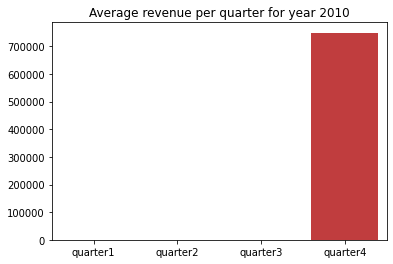

In [176]:
rev_year=data[data['year']==2010]
rev_year.groupby('month').sum()
rev_year_qt=dict()
rev_year_qt['quarter1']=rev_year[(rev_year['month']<=3)]['revenue'].sum()
rev_year_qt['quarter2']=rev_year[(rev_year['month']>3) & (rev_year['month']<=6)]['revenue'].sum()
rev_year_qt['quarter3']=rev_year[(rev_year['month']>6) & (rev_year['month']<=9)]['revenue'].sum()
rev_year_qt['quarter4']=rev_year[(rev_year['month']>9) & (rev_year['month']<=12)]['revenue'].sum()
rev_per_quarter=pd.Series(data=rev_year_qt)
plt.title('Average revenue per quarter for year 2010')
snb.barplot(x=rev_per_quarter.index,y=rev_per_quarter.values)
plt.show()

**Quarterly revenue for year 2011**

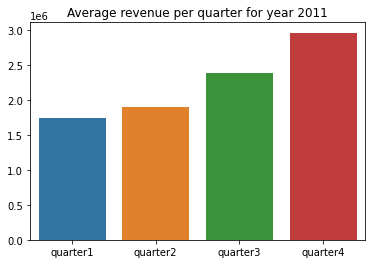

In [177]:
rev_year=data[data['year']==2011]
rev_year.groupby('month').sum()
rev_year_qt=dict()
rev_year_qt['quarter1']=rev_year[(rev_year['month']<=3)]['revenue'].sum()
rev_year_qt['quarter2']=rev_year[(rev_year['month']>3) & (rev_year['month']<=6)]['revenue'].sum()
rev_year_qt['quarter3']=rev_year[(rev_year['month']>6) & (rev_year['month']<=9)]['revenue'].sum()
rev_year_qt['quarter4']=rev_year[(rev_year['month']>9) & (rev_year['month']<=12)]['revenue'].sum()
rev_per_quarter=pd.Series(data=rev_year_qt)
plt.title('Average revenue per quarter for year 2011')
snb.barplot(x=rev_per_quarter.index,y=rev_per_quarter.values)
plt.show()

**Highest sales month in UK**

In [178]:
uk_sales=data[data['Country'] == 'United Kingdom']
uk_sales
sales_months=uk_sales.groupby('month').sum()['revenue'].sort_values(ascending=False)[:12]
print(sales_months)
print('Highest sales month in UK: ',uk_sales.groupby('month').sum()['revenue'].idxmax())

month
11    1282805.780
12    1065478.050
10     877438.190
9      862018.152
5      596459.860
7      565479.841
3      559707.390
6      554478.350
8      539130.500
4      442254.041
1      434308.300
2      408247.910
Name: revenue, dtype: float64
Highest sales month in UK:  11


In [215]:
uk_data_2010=data[(data['Country']=='United Kingdom') & (data['year']==2010)]
uk_data_2011=data[(data['Country']=='United Kingdom') & (data['year']==2011)]
uk_top_sales_month_2010=uk_data_2010.groupby('month').sum()['revenue'].sort_values(ascending=False)[:12]
print('Sales in eah month in 2010')
print(uk_top_sales_month_2010)
uk_top_sales_month_2011=uk_data_2011.groupby('month').sum()['revenue'].sort_values(ascending=False)[:12]
print('Sales in eah month in 2011')
print(uk_top_sales_month_2011)
print('Highest sales month in UK in 2010: ',uk_top_sales_month_2010.idxmax())
print('Highest sales month in UK in 2011: ',uk_top_sales_month_2011.idxmax())

Sales in eah month in 2010
month
12    676742.62
Name: revenue, dtype: float64
Sales in eah month in 2011
month
11    1282805.780
10     877438.190
9      862018.152
5      596459.860
7      565479.841
3      559707.390
6      554478.350
8      539130.500
4      442254.041
1      434308.300
2      408247.910
12     388735.430
Name: revenue, dtype: float64
Highest sales month in UK in 2010:  12
Highest sales month in UK in 2011:  11


**Top sales week in UK**

In [179]:
data['week']=data['InvoiceDate'].dt.isocalendar().week
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,revenue,week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,15.30,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,22.00,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,48


In [217]:
uk_data=data[data['Country']=='United Kingdom']
uk_top_week=uk_data.groupby('week').sum()['revenue'].sort_values(ascending=False)[:12]
print('Top sales week in UK: ',uk_top_week.idxmax())

Top sales week in UK:  49


In [212]:
uk_data_2010=data[(data['Country']=='United Kingdom') & (data['year']==2010)]
uk_data_2011=data[(data['Country']=='United Kingdom') & (data['year']==2011)]
uk_top_sales_week_2010=uk_data_2010.groupby('week').sum()['revenue'].sort_values(ascending=False)[:12]
print(uk_top_sales_week_2010)
uk_top_sales_week_2011=uk_data_2011.groupby('week').sum()['revenue'].sort_values(ascending=False)[:12]
print(uk_top_sales_week_2011)
print('Highest sales week in UK in 2010: ',uk_top_sales_week_2010.idxmax())
print('Highest sales week in UK in 2011: ',uk_top_sales_week_2011.idxmax())

week
49    244020.45
50    191501.99
48    166116.72
51     75103.46
Name: revenue, dtype: float64
week
46    324634.370
45    311236.140
48    289207.390
47    269658.020
38    266286.811
49    265834.070
40    259423.220
44    255289.020
43    198697.750
42    197359.970
37    190620.420
39    184006.431
Name: revenue, dtype: float64
Highest sales week in UK in 2010:  49
Highest sales week in UK in 2011:  46


**Top and Least 5 countries by revenue**

In [181]:
#Least 5 countries by revenue
country_revenue=data.groupby('Country').sum()
least_5_counties_by_revenue=country_revenue['revenue'].sort_values(ascending=True)[:5]
print(least_5_counties_by_revenue)

Country
Saudi Arabia       131.17
Bahrain            548.40
Czech Republic     707.72
RSA               1002.31
Brazil            1143.60
Name: revenue, dtype: float64


In [182]:
#Top 5  countries by revenue
top_5_countries_by_revenue=country_revenue['revenue'].sort_values(ascending=False)[:5] / 10**6
print("Top five countries by Revenue(in millions)-",top_5_countries_by_revenue)

Top five countries by Revenue(in millions)- Country
United Kingdom    8.187806
Netherlands       0.284662
EIRE              0.263277
Germany           0.221698
France            0.197404
Name: revenue, dtype: float64


**PRODUCTS DATA ANALYSIS**

**Top 10 products wuth maximum Revenue and Revenue proportion of each product**

In [183]:
#Top 10 procucts with maximum revenue
products_revenue=data.groupby(['Description']).sum()
print(products_revenue['revenue'].sort_values(ascending=False)[:10])

Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
RABBIT NIGHT LIGHT                     66756.59
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
ASSORTED COLOUR BIRD ORNAMENT          58959.73
CHILLI LIGHTS                          53768.06
Name: revenue, dtype: float64


In [184]:
#Revenue proportion of each top 10 products
revenue_proportion=(products_revenue['revenue'].sort_values(ascending=False)[:10]/sum(products_revenue['revenue']))*100
print(revenue_proportion)

Description
DOTCOM POSTAGE                        2.115827
REGENCY CAKESTAND 3 TIER              1.690259
WHITE HANGING HEART T-LIGHT HOLDER    1.022477
PARTY BUNTING                         1.008469
JUMBO BAG RED RETROSPOT               0.947460
RABBIT NIGHT LIGHT                    0.684841
POSTAGE                               0.679446
PAPER CHAIN KIT 50'S CHRISTMAS        0.654427
ASSORTED COLOUR BIRD ORNAMENT         0.604855
CHILLI LIGHTS                         0.551595
Name: revenue, dtype: float64


**Best time to sell top 3 products**

In [206]:
product_data_index=data.groupby('Description').sum().sort_values(by=['revenue'],ascending=False)[:3].index
uk_data=data[data['Country']=='United Kingdom']
for product in product_data_index:
    month=uk_data[uk_data['Description']==product].groupby('month').sum()['revenue'].idxmax()
    print(f"Best month to sell {product} is: {month}")

Best month to sell DOTCOM POSTAGE is: 12
Best month to sell REGENCY CAKESTAND 3 TIER is: 12
Best month to sell WHITE HANGING HEART T-LIGHT HOLDER is: 1


**Top returned products across countries**

In [192]:
#Top returned product for each country
products_by_country=data[data['revenue']<0].groupby(['Country','Description'])['revenue'].sum()
products_by_country.loc['United Kingdom'].idxmin()
country_wi_ret_prod=data[data['revenue']<0]['Country'].unique()
top_returned_products=dict()
for country in country_wi_ret_prod:
    top_returned_products[country]=products_by_country.loc[country].idxmin()
country_wi_ret_prod=pd.Series(top_returned_products)
print(country_wi_ret_prod)

AMAZON FEE
United Kingdom                                AMAZON FEE
Germany                                           Manual
EIRE                                              Manual
Italy                      WELCOME  WOODEN BLOCK LETTERS
France                                            Manual
Australia                     COTTON APRON PANTRY DESIGN
Sweden                   SET OF 3 BABUSHKA STACKING TINS
Portugal                                          Manual
Austria                         KINGS CHOICE BISCUIT TIN
Israel                           SPACEBOY TV DINNER TRAY
Belgium                                          POSTAGE
Bahrain               OCEAN SCENT CANDLE IN JEWELLED BOX
Spain                                             Manual
Japan                 ROUND SNACK BOXES SET OF 4 FRUITS 
Channel Islands                                   Manual
Netherlands                     36 FOIL HEART CAKE CASES
Switzerland                             JUMBO BAG APPLES
Cyprus              

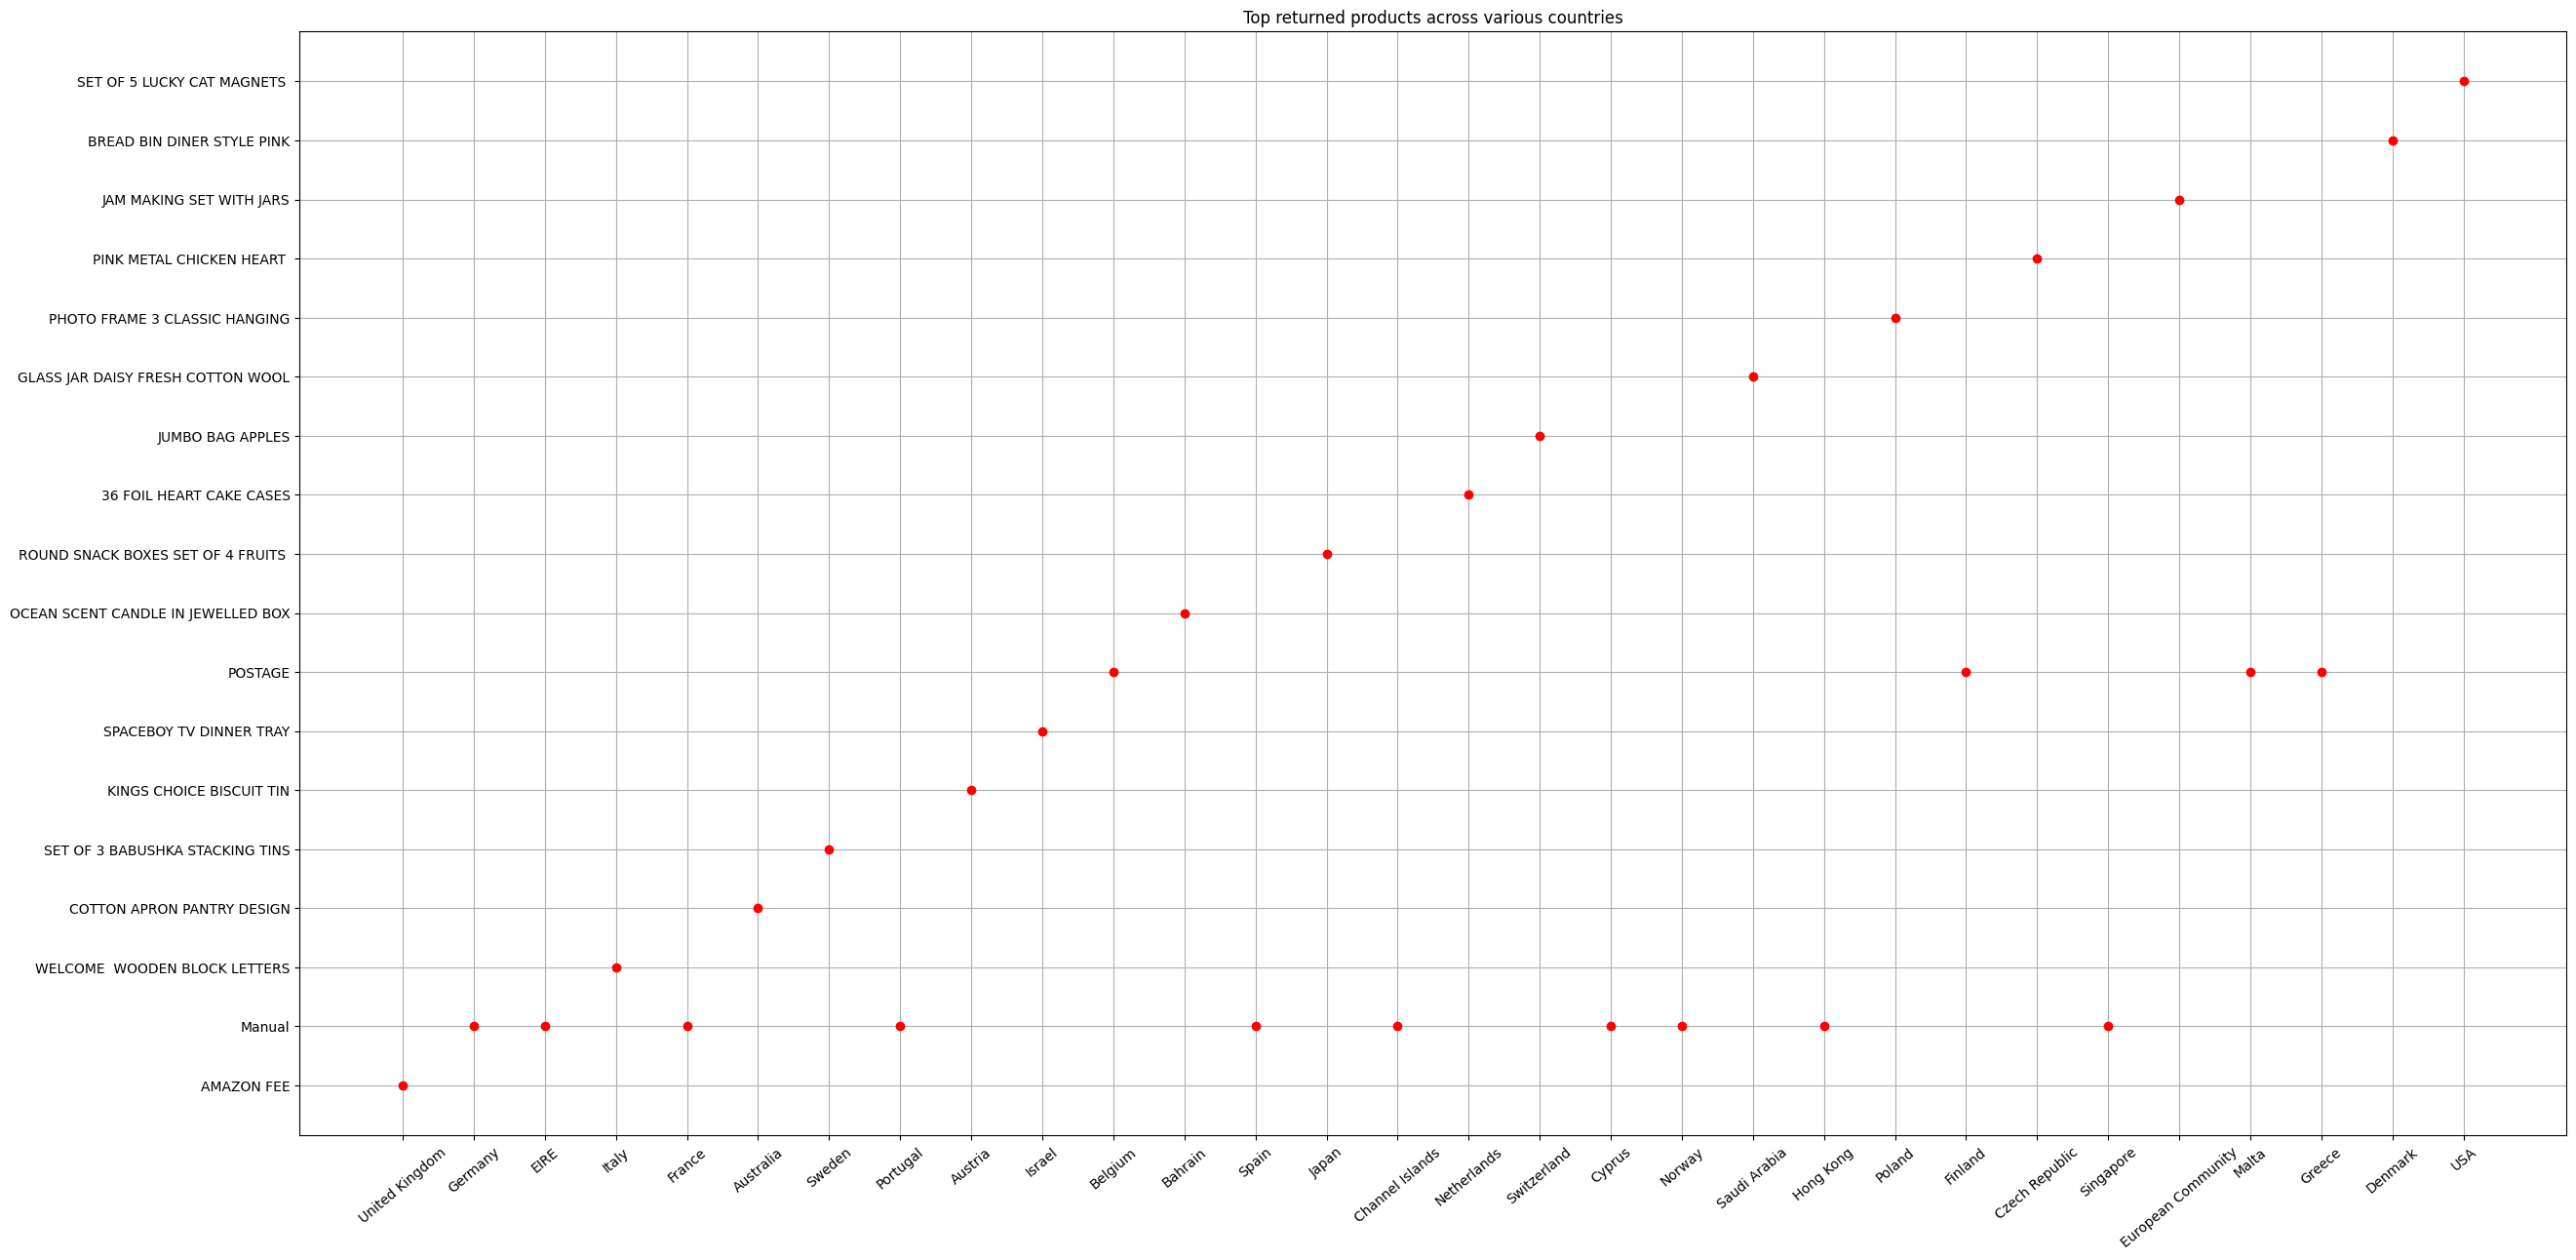

In [187]:
#Plot for above solution
plt.figure(figsize=(30,15),dpi=100)
plt.xticks(rotation=40)
plt.plot(list(country_wi_ret_prod.index),country_wi_ret_prod.tolist(),'ro')
plt.grid()
plt.title('Top returned products across various countries')
plt.show()